# Проект: Исследование стартапов

Автор Богатырева Вика

Дата 17.02.25

# Содержание

[Введение](#1)<br>
[Шаг 1. Знакомство с данными: загрузка и первичная предобработка](#2)<br>
  [1.1. Вывод общей информации, исправление названия столбцов ](#3)<br>
  [1.2. Смена типов и анализ пропусков](#4)<br>
[Шаг 2. Предобработка данных, предварительное исследование](#5)<br>
  [2.1. Раунды финансирования по годам](#6)<br>
  [2.2. Люди и их образование](#7)<br>
  [2.3. Объединять или не объединять — вот в чём вопрос ](#8)<br>
  [2.4. Проблемный датасет и причина возникновения пропусков ](#9)<br>
[Шаг 3. Исследовательский анализ объединённых таблиц](#10)<br>
  [3.1. Объединение данных](#11)<br>
  [3.2. Анализ выбросов](#12)<br>
  [3.3. Куплены забесплатно?](#13)<br>
  [3.4. Цены стартапов по категориям ](#14)<br>
  [3.5. Сколько раундов продержится стартап перед покупкой](#15)<br>
[Шаг 4. Итоговый вывод и рекомендации](#16)<br>

# Введение
<a id="1"></a>

**Знакомство с проектом**

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

# Шаг 1. Знакомство с данными: загрузка и первичная предобработка

<a id="2"></a>

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


# 1.1. Вывод общей информации, исправление названия столбцов 

<a id="3"></a>

In [1]:
!pip install phik


In [ ]:
# Импортируем библиотеки
import pandas as pd

from scipy.stats import median_abs_deviation

# Глобально изменить настройки вывода, чтобы отображать все строки
pd.set_option('display.max_rows', None)

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# from phik import phik_matrix

plt.style.use('ggplot')


* Загрузите все данные по проекту.

In [ ]:
# Выгружаем данные в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')


* Проверьте названия столбцов.

In [ ]:
# проверяю названия столбцов
acquisition_df.info()

In [ ]:
# изменю id на id_buy
acquisition_df.rename(columns={'id': 'id_buy'}, inplace=True)

In [ ]:
acquisition_df.columns

In [ ]:
acquisition_df.head()

In [ ]:
# тут надо заменить пробелы на _
company_and_rounds_df.columns

In [ ]:
# заменила пропуски на _
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

In [ ]:
# меняю company_ID на company_id_1 т к есть еще столбец company_id
company_and_rounds_df.rename(columns={'company_ID': 'company_id_1'}, inplace=True)

In [ ]:
# проверяю, теперь у меня 2 company_id_1 и company_id
company_and_rounds_df.columns

In [ ]:
# вывела 200 строк и посмотрела на значения двух столбцов
# в company_id_1 полные данные, а в company_id эти же данные, но с пропусками
company_and_rounds_df[['company_id_1', 'company_id']].head()

In [ ]:
# изменю название столбца name на name_company
company_and_rounds_df.rename(columns={'name': 'name_company'}, inplace=True)

In [ ]:
# проверяю
company_and_rounds_df.columns

In [ ]:
# проверяю названия столбцов, все ок
degrees_df.columns

In [ ]:
# проверяю названия столбцов, все ок
education_df.columns

In [ ]:
# изменю название столбца id на id_educat
education_df.rename(columns={'id': 'id_educat'}, inplace=True)

In [ ]:
# проверяю
education_df.columns

In [ ]:
# проверяю названия столбцов
fund_df.columns

In [ ]:
# изменю название столбца id на id_fund
fund_df.rename(columns={'id': 'id_fund'}, inplace=True)

In [ ]:
# проверяю
fund_df.columns

In [ ]:
# проверяю названия столбцов
investment_df.columns

In [ ]:
# изменю название столбца id на id_people
investment_df.rename(columns={'id': 'id_people'}, inplace=True)

In [ ]:
# проверяю
investment_df.columns

In [ ]:
# проверяю названия столбцов
people_df.columns

In [ ]:
# изменю название столбца id на id_people
people_df.rename(columns={'id': 'id_people'}, inplace=True)

In [ ]:
# проверяю
people_df.columns


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Вот мои дф:

* acquisition_df
* company_and_rounds_df
* degrees_df
* education_df
* people_df
* fund_df
* investment_df

Посмотрю на кол-во пропусков

In [ ]:
acquisition_df.info()

In [ ]:
# в term_code много пропусков
acquisition_df.isna().sum()

In [ ]:
# доля пропусков в процентах
a = round((acquisition_df.isna().sum() / acquisition_df.shape[0]) * 100, 0)
a

In [ ]:
aaaa = acquisition_df.isna().mean() * 100
aaaa

In [ ]:
company_and_rounds_df.info()

In [ ]:
company_and_rounds_df.isna().sum()

In [ ]:
# доля пропусков в процентах
b = round((company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]) * 100, 0)

In [ ]:
company_and_rounds_df.head()

In [ ]:
degrees_df.info()

In [ ]:
degrees_df.isna().sum()

In [ ]:
# доля пропусков в процентах
c = round((degrees_df.isna().sum() / degrees_df.shape[0]) * 100, 0)

In [ ]:
education_df.info()

In [ ]:
education_df.isna().sum()

In [ ]:
# доля пропусков в процентах
d = round((education_df.isna().sum() / education_df.shape[0]) * 100, 0)

In [ ]:
people_df.info()

In [ ]:
people_df.isna().sum()

In [ ]:
# доля пропусков в процентах
e = round((people_df.isna().sum() / people_df.shape[0]) * 100, 0)

In [ ]:
fund_df.info()

In [ ]:
fund_df.isna().sum()

In [ ]:
# доля пропусков в процентах
f = round((fund_df.isna().sum() / fund_df.shape[0]) * 100, 0)

In [ ]:
investment_df.info()

In [ ]:
# тут нет пропусков
investment_df.isna().sum()

In [ ]:
# доля пропусков в процентах
g = round((investment_df.isna().sum() / investment_df.shape[0]) * 100, 0)

In [ ]:
# неудобно смотреть эти доли...попробую оъединить 7 серий с долями пропусков в 1 таблицу

list_of_s = pd.DataFrame({
    'acquisition_df': a,
    'company_and_rounds_df': b,
    'degrees_df': c,
    'education_df': d,
    'people_df': e,
    'fund_df': f,
    'investment_df': g
})

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(list_of_s, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('Доли пропусков в 7 дф (в %)')
plt.xlabel('Датафреймы')
plt.ylabel('Столбцы')
plt.show()

Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

**Вывод:** у многих столбцов повторяются названия в разных дф. Я уже заменила чатсь названий у столбцов id. Дальше, скорее всего, буду заменять еще. Одинаковые названия столбцов могут стать проблемрй при объединении дф, в них можно запутаться. 

На тепловой диаграмме выше видно большое кол-во долей пропусков в %. Дальше нужно определить подходящие для работы дф и столбцы, и обработать только приоритетные.

# 1.2. Смена типов и анализ пропусков 

<a id="4"></a>

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [ ]:
# меняю тип данных столбца acquired_at на datetime
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

In [ ]:
# проверяю, все ок
acquisition_df.info()

In [ ]:
# проверяю
acquisition_df.head()

In [ ]:
# поменяю тип столбцов founded_at на datetime
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='ignore')
# поменяю тип столбцов closed_at на datetime
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors='ignore')
# поменяю тип столбцов funded_at на datetime
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='ignore')

In [ ]:
company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']].head()

In [ ]:
# получилось поменять типы данных у столбцов founded_at, closed_at, funded_at
company_and_rounds_df.info()

In [ ]:
education_df.info()

In [ ]:
# поменяю тип столбца graduated_at на datetime
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

In [ ]:
# получилось
education_df.info()

In [ ]:
education_df.head()

In [ ]:
fund_df.info()

In [ ]:
# поменяю тип столбца graduated_at на datetime
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'], errors='coerce')

In [ ]:
# получилось
fund_df.info()

In [ ]:
fund_df.head()


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

**Вывод:** в целом данных много, но также много пропусков. этом может повлиять на исходный результат исследования. ДФ company_and_rounds_df вызывает вопросы...там явно не хватает информации. 

# Шаг 2. Предобработка данных, предварительное исследование

<a id="5"></a>


# 2.1. Раунды финансирования по годам 

<a id="6"></a>

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [ ]:
company_and_rounds_df.head()

In [ ]:
# вывожу год в новый стобец
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

In [ ]:
# сводная таблицу по годам, в которой на основании столбца raised_amount
# для каждого года указан типичный размер средств, выделяемый в рамках одного раунда
# и общее количество раундов финансирования за этот год.

pivot_table = company_and_rounds_df.groupby('funded_year').agg(
    raised_amount_mean=('raised_amount', 'median'),
    count_rounds=('funding_rounds', 'count')
).reset_index()

pivot_table

In [ ]:
pivot_table

In [ ]:
# максимальное значение финансирования
max_item = pivot_table['raised_amount_mean'].max()
max_item

In [ ]:
new_pivot_table = pivot_table[pivot_table['count_rounds'] > 50]
new_pivot_table

In [ ]:
# вывод линейной диаграммы
plt.figure(figsize=(12, 8))
plt.plot(new_pivot_table['funded_year'], new_pivot_table['raised_amount_mean'], marker='o', color='b')
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Размер финансирования в млн')
plt.xticks(new_pivot_table['funded_year'])  # вывод всех лет на оси
# настройка формата отображения чисел (добавила настройку для вывода y)
# plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True)
plt.show()

In [ ]:
# удаляю новый стобец funded_year, он пока нужен
company_and_rounds_df = company_and_rounds_df.drop(columns=['funded_year'])

In [ ]:
company_and_rounds_df.info()

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

В сводной таблице видно, что типичный размер собранных в рамках одного раунда средств был максимален в 1994 году. Размер финансирования составил = 6700000.

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

В 2013 году кол-во раундов = 11042 (это максимальное кол-во раундов за исследуемый период). Типичный размер средств составил 1200000. Тенденция к росту раундов растет год от года, это видно на сводной таблице, а финансирование раундов падает.


# 2.2. Люди и их образование 

<a id="7"></a>

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [ ]:
people_df.info()

In [ ]:
people_df.head()

In [ ]:
education_df.info()

In [ ]:
education_df.head()

In [ ]:
# объединила 2 дф, первым выбрала people_df
two_df_t = pd.merge(people_df, education_df, left_on='id_people', right_on='person_id', how='left')

In [ ]:
two_df_t.info()

In [ ]:
two_df_t.head()

In [ ]:
# добавляю новый столбец, чтобы знать кол-во сотрудников в компании
two_df_t['count_emp'] = two_df_t.groupby('company_id')['id_people'].transform('count')

In [ ]:
# Категоризирую группы компаний
bins = [0, 1, 2, 3, 10, 50, float('inf')]
# разделила компании примерно по количеству значений на глаз
# было оч много значений 1, 2,3, а остыльных меньше и меньше
labels = ['1 сотрудник', '2 сотрудника', '3 сотрудника', '4-10 сотрудников', '11-50 сотрудников', '51+ сотрудников']

two_df_t['categories_groups'] = pd.cut(two_df_t['count_emp'], bins, labels=labels)

In [ ]:
# проверяю
two_df_t.head()

In [ ]:
# считаю среднюю долю без инфы об образовании
# доля без информации = количество пропусков / количество всех строк

dolia = two_df_t.groupby('categories_groups').agg(
    # считаю общее кол-во сотрудников
    count_employee=('id_people', 'size'),  
    # считаю пропуски в id_educat
    miss_educate=('id_educat', lambda x: x.isna().sum())  
).reset_index()

# доля без информации в % = (количество пропусков / количество всех строк) * 100
dolia['miss_dolia'] = (dolia['miss_educate'] / dolia['count_employee']) * 100

display(dolia[['categories_groups', 'miss_dolia']])

**Вывод**: чтобы посчитать кол-во сотрудников по компаниям, добавила столбец count_emp. Разделила сотрудников в categories_groups по частоте встречаемости, значения кол-ва сотрудников 1, 2, 3  встречались очень часто. До 10 сотрудников в компании это скорее всего стартап. От 11 до 50 сотрудников в мальньких компаниях и от 50 и выше в масштабируемых, больших компаниях. 

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv.

In [ ]:
# попробую удалить 'p:' из object_id
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '', regex=False)

In [ ]:
# меняю тип данных столбцу object_id на int
degrees_df['object_id'] = degrees_df['object_id'].astype('int64')

In [ ]:
degrees_df.info()

In [ ]:
people_df.info()

In [ ]:
# объединила education_df и degrees_df, также можно и по inner
two = pd.merge(education_df, degrees_df, left_on='person_id', right_on='object_id', how='left')

In [ ]:
# в объединенном дф увеличилось кол-во строк в 2 раза (считаю, что это неправильное объединение) 
two.info()

In [ ]:
degrees_df.info()

In [ ]:
people_df.info()

In [ ]:
# попробую объединить people_df и degrees_df (при left кол-во строк увеличивается на 40к)
second = pd.merge(people_df, degrees_df, left_on='id_people', right_on='object_id', how='left')

In [ ]:
second.info()

**Вывод**: Думаю, что не нужно присоединять дф degrees_df. Данных получается больше, происходит неккоректное присоединение. 

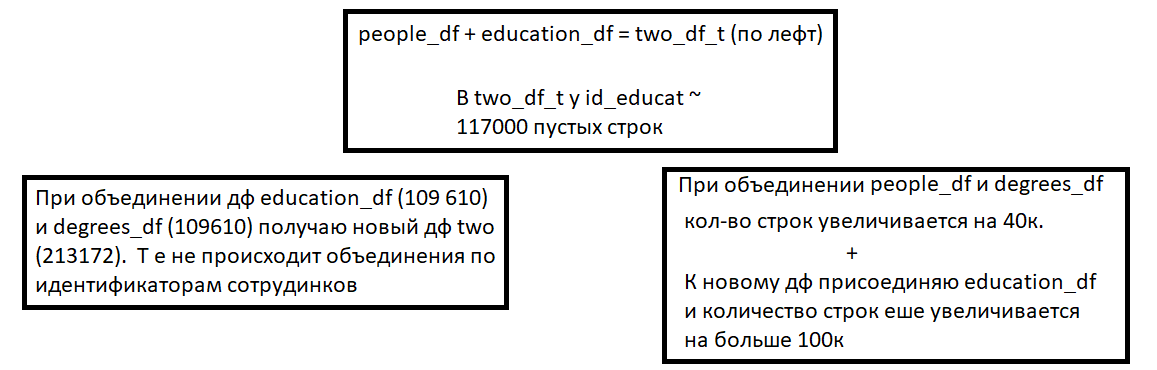

# 2.3. Объединять или не объединять — вот в чём вопрос 

<a id="8"></a>

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [ ]:
# столбец network_username встречается в дф company_and_rounds_df и people_df
# считаю кол-во непустых ячеек в столбце
company_and_rounds_df['network_username'].count()

In [ ]:
# считаю кол-во непустых ячеек в столбце
people_df['network_username'].count()

In [ ]:
# считаю кол-во строк в дф
company_and_rounds_df.shape[0]

In [ ]:
# считаю кол-во строк в дф
people_df.shape[0]

In [ ]:
# считаю кол-во уникальных значений 
company_and_rounds_df['network_username'].nunique()

In [ ]:
# считаю кол-во уникальных значений 
people_df['network_username'].nunique()

In [ ]:
# попробую найти пересечения в двух столбцах

first = set(company_and_rounds_df['network_username'])
second = set(people_df['network_username'])
intersections = first.intersection(second)


In [ ]:
len_in = len(intersections)
len_in

**Вывод:**  
    
В company_and_rounds_df['network_username']:
1. всего кол-во строк 217774
2. кол-во непустых ячеек 95534 
3. количество уникальных значений 79571

В people_df['network_username']:
1. всего кол-во строк 226709
2. кол-во непустых ячеек 38867
3. количество уникальных значений 38421

Есть совпадающие данные в двух столбцах (2200, 1% совпадений). 


# 2.4. Проблемный датасет и причина возникновения пропусков 

<a id="9"></a>

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [ ]:
company_and_rounds_df.head()

In [ ]:
# считаю пропуски (всего строк 217774)
gg = company_and_rounds_df.isna().sum()

In [ ]:
# считаю пропуски
jk = company_and_rounds_df.shape[0]

In [ ]:
# доли проусков
prop_empties = (gg / jk) * 100
prop_empties

При изучении доли пропусков видно, что начиная от funding_round_id до is_last_round доля пропусков у столбцов практически одна и таже - 75%. А у столбцов от investment_rounds до milestones - одинаковая доля пропусков. 

Для удобства можно разделить таблицу на 2 части:
1. первая таблица будет со столбцами company_id_1 - milestones 
2. funding_round_id - is_last_round 

У столбца company_id очень много пропусков. Можно ли заменить столбец company_id на company_id_1...попробую проверить совподения в столбцах company_id, company_id_1. Если совпадений будет 25%, то можно сделать вывод что company_id и есть company_id_1. Чуда не случилось и проверить пересечение не удалось из-за большого кол-ва данных.

Еще думаю само название говорит за себя. Дф называется company_and_rounds. Как будто объединили информацию company и rounds по лефт (много пропусков именно в правой части т е во второй таблице)

In [ ]:
# Код пример ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company_and_rounds_df)
plt.show()

In [ ]:
# делаю копию дф
company_and_rounds_df_copy = company_and_rounds_df.copy()

In [ ]:
# разделю дф company_and_rounds_df по столбцам на 2 дф

company_df = company_and_rounds_df_copy[['company_id_1', 'name_company', 
                                    'category_code', 'status', 
                                    'founded_at', 'closed_at',
                                    'domain', 'network_username', 'country_code',
                                    'investment_rounds', 'funding_rounds',
                                    'funding_total', 'milestones']]

# для rounds_df я не включаю столбец company_id, а сразу заменяю его на company_id_1
rounds_df = company_and_rounds_df_copy[['funding_round_id', 'company_id', 'funded_at',
                                   'funding_round_type', 'raised_amount', 'pre_money_valuation', 
                                   'participants', 'is_first_round', 'is_last_round']] 

**Обработаю таблицу company_df**

In [ ]:
# есть повторяющиеся строки, некоторомы столбцам поменяю типы
company_df.head()

In [ ]:
company_df.info()

In [ ]:
# тут удаляю inf и явно указываю что хочу изменить столбец в родительском дф 
company_df.loc[:, 'company_id_1'] = company_df['company_id_1'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'company_id_1'] = company_df['company_id_1'].astype('Int32')

In [ ]:
company_df.loc[:, 'investment_rounds'] = company_df['investment_rounds'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'investment_rounds'] = company_df['investment_rounds'].astype('Int32')

In [ ]:
company_df.loc[:, 'funding_rounds'] = company_df['funding_rounds'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'funding_rounds'] = company_df['funding_rounds'].astype('Int32')

In [ ]:
company_df['funding_total'].unique()

In [ ]:
company_df.loc[:, 'funding_total'] = company_df['funding_total'].replace([np.inf, -np.inf], np.nan)

# удаляю строки с NA значениями
company_df.dropna(subset=['funding_total'], inplace=True)
company_df.loc[:, 'funding_total'] = company_df['funding_total'].astype('int64')

In [ ]:
company_df.loc[:, 'milestones'] = company_df['milestones'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'milestones'] = company_df['milestones'].astype('Int32')

In [ ]:
# инфо о дф до удаления дубликатов
company_df.info()

In [ ]:
# есть повторяющиеся строки, некоторомы столбцам поменяю типы
company_df.head(1)

In [ ]:
company_df.isna().mean() * 100

In [ ]:
# удаляю дубликаты и записываю дф company_df в company_df_empty
company_df_empty = company_df.drop_duplicates()

In [ ]:
company_df_empty.info()

In [ ]:
# удалю пустые строки 
company_df_empty = company_df.dropna(how='all')

In [ ]:
# вывожу доли пропусков
company_df_empty.isna().mean() * 100

**Теперь обработаю таблицу rounds_df**

In [ ]:
rounds_df.head(10)

In [ ]:
company_df_empty.info()

In [ ]:
# предобработка данных в rounds_df
rounds_df.info()

In [ ]:
# вывожу доли пропусков
rounds_df.isna().mean() * 100

Меня смущает большое кол-во пропусков во всех столбцах. В учебнике практикума было сказано, что не рекомендуют удалять пропуски, где больше 5%. Но тут у всех столбцов почти одинаковый процент пропусков. Думаю 2 таблицы присоединили по full join и так появилось много дубликатов, и много пропусков.

In [ ]:
# удалю пустые строки 
rounds_df_empty = rounds_df.dropna(how='all')

In [ ]:
# удаляю дубликаты
rounds_df_empty = rounds_df_empty.drop_duplicates()

In [ ]:
rounds_df_empty.info()

In [ ]:
# вроде все четко
rounds_df_empty.isna().mean() * 100

In [ ]:
rounds_df_empty.head()

In [ ]:
# меняю тип данных 
rounds_df_empty['funding_round_id'] = rounds_df_empty['funding_round_id'].astype('int32')

In [ ]:
# меняю тип данных 
rounds_df_empty['company_id'] = rounds_df_empty['company_id'].replace([np.inf, -np.inf], np.nan)
rounds_df_empty['company_id'] = rounds_df_empty['company_id'].astype('int32')

In [ ]:
rounds_df_empty['raised_amount'] = rounds_df_empty['raised_amount'].astype('int64')
rounds_df_empty['pre_money_valuation'] = rounds_df_empty['pre_money_valuation'].astype('int64')
rounds_df_empty['participants'] = rounds_df_empty['participants'].astype('int16')
rounds_df_empty['is_first_round'] = rounds_df_empty['is_first_round'].astype('int16')
rounds_df_empty['is_last_round'] = rounds_df_empty['is_last_round'].astype('int16')

In [ ]:
rounds_df_empty.info()

In [ ]:
rounds_df_empty.head(15)

**Вывод**: разделила один большой дф на 2 поменьше. Обработала данные в таблицах, привела в удобный вид. Для дф rounds_df_empty удалила пустые строки и привела нужные столбцы к типу int. Также удалила дубликаты в обоих дф. 


# Шаг 3. Исследовательский анализ объединённых таблиц




# 3.1. Объединение данных

<a id="11"></a>
Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [ ]:
# кол-во уникальных значений в company_df_empty['company_id_1'] до оъединения дфов
display(company_df_empty['company_id_1'].nunique())

In [ ]:
# кол-во уникальных значений в rounds_df_empty['company_id'] до оъединения дфов
display(rounds_df_empty['company_id'].nunique())

In [ ]:
# объединяю два дф company_df_empty и rounds_df_empty

merged_dfs = pd.merge(company_df_empty, rounds_df_empty, left_on='company_id_1', right_on='company_id', how='inner')

In [ ]:
merged_dfs.shape

In [ ]:
# фильтрую данные

new_merged_dfs = merged_dfs[
    (merged_dfs['funding_rounds'] > 0) | 
    (merged_dfs['investment_rounds'] > 0) | 
    (merged_dfs['status'] == 'acquired')]

new_merged_dfs.shape

In [ ]:
# удаляю дубликаты (уверена что они появились)
new_merged_dfs = new_merged_dfs.drop_duplicates()
new_merged_dfs.shape

In [ ]:
new_merged_dfs.info()

Объединила данные из двух обработанных дф company_df_empty и rounds_df_empty (из задания 2.4). Получила новый дф new_merged_dfs с количеством строк 52626. Дальше буду работать с дф new_merged_dfs.

# 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.
* По предобработанному столбцу funding_total графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом .describe(), — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [ ]:
# вывожу гистограмму
plt.figure(figsize=(10, 6))
plt.hist(new_merged_dfs['funding_total'],  bins=20, edgecolor='black')
plt.title('График 1. Распеределение общего финансирования для компаний (с лог шкалами)')
plt.xlabel('Общее финансирование')
plt.ylabel('Количество компаний')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()



In [ ]:
# отфильтрую нули в funding_total
without_nulls = new_merged_dfs[new_merged_dfs['funding_total'] > 0]
without_nulls.shape

In [ ]:
# вывожу гистограмму
plt.figure(figsize=(10, 6))
plt.hist(without_nulls['funding_total'], bins=20, edgecolor='black')
plt.title('График 2. Распеределение общего финансирования для компаний (с лог шкалами)')
plt.xlabel('Общее финансирование')
plt.ylabel('Количество компаний')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()

График 2 получился некрасивый. График 1 выглядит более опрятно.

In [ ]:
# распределение значений по столбцу
without_nulls['funding_total'].describe()

In [ ]:
# вычисляю квартили, чтобы избавиться от выбросов
Q1 = without_nulls['funding_total'].quantile(0.25)
Q3 = without_nulls['funding_total'].quantile(0.75)
IQR = Q3 - Q1
Q1

In [ ]:
Q3

In [ ]:
IQR

In [ ]:
# рассчитываю границы для выбросов 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

In [ ]:
upper_bound

In [ ]:
# удаляю выбросы
without_nulls = without_nulls[(without_nulls['funding_total'] >= lower_bound) & 
                                (without_nulls['funding_total'] <= upper_bound)]

In [ ]:
# выведу ящик с усами без нулевых значений в funding_total (дф without_nulls)

plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
without_nulls.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распеределение общего финансирования для компаний')
plt.xlabel('Общее финансирование')

# Выводим график
plt.show()

**Вывод**: на боксплоте видно, что медиана смещена влево. Левый ус короче правого. В правой части данные имеют больше вариативности. Медиана расположена левее. Это говорит о том, что большая часть данных относится к левой стороне. Также видно, что медиана больше среднего значения почти в 2 раза и стандартное отклонение std велико (это говорит о большом разнообразии данных).

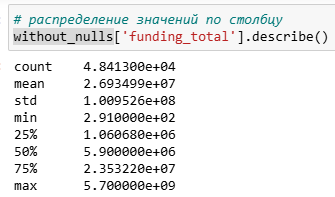

Какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся?

Типичный размер финансирования расположен в диапазоне от 25го до 50го процентилями. Даже, наверное, все что ближе к медиане и есть типичный размер финансирования. А выбивающийся размер финансирования - все что больше 75 процентиля. 


# 3.3. Куплены забесплатно? 

<a id="13"></a>

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [ ]:
new_merged_dfs.info()

In [ ]:
acquisition_df.info()

In [ ]:
# использую дф without_nulls
# присоединяю without_nulls и acquisition_df

three_dfs = pd.merge(new_merged_dfs, acquisition_df, left_on='company_id_1', right_on='acquired_company_id', how='inner')

three_dfs.shape

In [ ]:
# фильтрую данные по условию задачи
three_dfs_1 = three_dfs[(three_dfs['price_amount'] == 0) | 
                                (three_dfs['price_amount'] == 1) &
                     three_dfs['funding_total'] > 0]
three_dfs_1.shape

In [ ]:
# выведу ящик с усами

plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
three_dfs_1.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Исследование компаний, которые были проданы')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

На боксплоте видно, что финансирование распределено неравномерно для компаний, которые были проданы за 0 или 1$. Много выбросов.

In [ ]:
# вычисляю квартили и IQR 
Q1 = three_dfs_1['funding_total'].quantile(0.25)
Q3 = three_dfs_1['funding_total'].quantile(0.75)
IQR = Q3 - Q1
Q1

In [ ]:
Q3

In [ ]:
IQR

In [ ]:
# рассчитываю границы для выбросов 

lower_bound_1 = Q1 - 1.5 * IQR
upper_bound_1 = Q3 + 1.5 * IQR

In [ ]:
# для каких процентилей соответствуют границы выбросов
lower_per = (three_dfs_1['funding_total'] < lower_bound_1).mean() * 100
upper_per = (three_dfs_1['funding_total'] > upper_bound_1).mean() * 100

In [ ]:
# нижняя граница выбросов
lower_per

In [ ]:
# верхняя граница выбросов
100 - upper_per

**Вывод**: нижняя граница выбросов = 0%, а верхняя = 97%. Нижняя граница (0й процентиль) равна минимальному значению.
Верхняя граница (97й процентиль) лучше учитывает распределение данных.


# 3.4. Цены стартапов по категориям 

<a id="14"></a>

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [ ]:
three_dfs.info()

In [ ]:
# фильтрую данные, без фильтрации в describe получались нули в min, 25%, 50%
three_dfs = three_dfs[three_dfs['price_amount'] > 0]
three_dfs.shape

In [ ]:
display(three_dfs['price_amount'].describe())

In [ ]:
# выведу ящик с усами

plt.figure(figsize=(10, 6))
plt.boxplot(three_dfs['price_amount'], vert=False)
plt.title('Боксплот цен на компании')
plt.xlabel('Сумма сделки')
plt.grid(True)
plt.show()


На графике видно много выбросов. Медиана смещена влево. Большее кол-во значений сумм сделок относится к левой части. Есть крупные сделки в шкале от 2 до 5. Большое кол-во точек расположено в диапазоне от 0.1 до 1.

In [ ]:
# уникальные значения в price_amount
# three_dfs['price_amount'].unique()

In [ ]:
three_dfs['price_amount'].min()

In [ ]:
three_dfs['price_amount'].max()

In [ ]:
# (Cтарое решение - не работает)

bins = [0, 10000000, 100000000, 500000000, float('inf')]
labels = ['low', 'avg', 'norm', 'huge']

three_dfs['category_cut'] = pd.cut(three_dfs['price_amount'], bins, labels=labels)

little_df = three_dfs[['category_cut', 'price_amount', 'category_code']].sort_values(ascending=False, by='price_amount')
little_df

little_df.groupby('category_cut')['category_cut'].count()

In [ ]:
# разброс значений

razbros_df = three_dfs.groupby('category_code').agg(median_price_amount=('price_amount', 'median'),
                                                    min_value=('price_amount', 'min'), 
                                                    max_value=('price_amount', 'max'),
                                                   ).reset_index()
razbros_df['minus'] = razbros_df['max_value'] - razbros_df['min_value']



In [ ]:
bins = [0, 10000000, 100000000, 500000000, float('inf')]
labels = ['low', 'avg', 'norm', 'huge']

razbros_df['median_category'] = pd.cut(razbros_df['median_price_amount'], bins, labels=labels)
razbros_df.sort_values(ascending=False, by='max_value')

In [ ]:
# строю диаграмму рассеяния для 'median_price_amount' и 'category_code'

# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(razbros_df['category_code'],
         razbros_df['median_price_amount'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Распределение цен по категориям')
plt.xlabel('Категория')
plt.ylabel('Цена (median')
plt.xticks(rotation=45, ha='right')
plt.grid()


# Отображаем график
plt.show()

**Вывод**: при изучении уникальных значений в столбце price_amount решила разделить следующим образом:
        
* low до 10м
* avg от 10м до 100м
* norm от 100м до 500м
* huge от 500м +

От Дмитрия: Получается больше всего компаний попало в ценовой диапазон avg от 10м до 100м, но это не дает нам информации ни о наибольших типичных ценах по категориям

В таблице razbros_df для категорий компаний вывела список медиан сумм сделок (median_price_amount). Категоризировала столбец median_price_amount на группы 'huge', 'avg', 'norm', 'huge'. Huge встречается 1 раз, norm = 16 раз, avg = 14 раз, low = 3 раза. Всего 34 категорий области деятельности компаний:

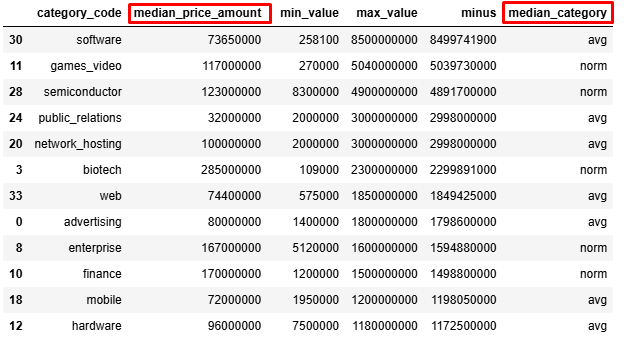

От Дмитрия: Тут важно рассмотреть как варьируются цены именно в пределах category_code.

Вывела график и выбрала топ 10 компаний для демонстрации с высокими максимальными значениями сумм сделок и максимальным разбросам данных (столбцы max_value и minus):

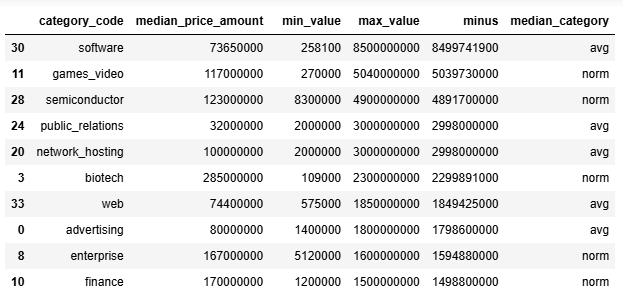

В топ-10 попали категории компаний: software, games_video, semiconductor, public_relations, network_hosting, biotech, web, advertising, enterprise, finance. Рекомендую заказчику обратить внимание на эти категории компаний.


# 3.5. Сколько раундов продержится стартап перед покупкой

<a id="15"></a>

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [ ]:
new_merged_dfs['funding_rounds'].describe()

Большинство стартапов имеют от 1 до 3 раундов финансирования. Медианное число раундов = 2.

In [ ]:
# тут непонятно, вывела общеее число раундов для каждого статуса
new_merged_dfs.groupby('status')['funding_rounds'].count()

In [ ]:
# тут уже понятней кол-во раундов для каждого статуса
oi_item = new_merged_dfs.groupby('status')['funding_rounds'].describe()
oi_item 

In [ ]:
# вывела столбцы, чтобы построить график
two_columns = oi_item.iloc[:, [1]]
two_columns_1 = two_columns.sort_values(ascending=False, by='mean')
two_columns_1

In [ ]:
two_columns_1.plot(kind='bar',
      title='Категории заведений, которые чаще являются сетевыми',
      ylabel='Медиана раундов',
      xlabel='Статусы стартапов',
      color='#3357FF',
      rot=0
)

**Вывод:**

* ipo - для данного статуса типичное значение 4 раундов.
* acquired - для данного статуса типичное значение 2 раунда.
* operating - для данного статуса типичное значение 2 раунда.
* closed - для данного статуса типичное значение 1 раунда.



# Шаг 4. Итоговый вывод и рекомендации

<a id="16"></a>

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Ой, какой-то тяжелый проект. В каждом задании второй части я использовала очищенный объединенный дф из задания 3.1 (new_merged_dfs).

Что я сделала: предобработала данные, объединила датафреймы, удалила пропуски, привела столбцы к нужному типу данных, избавилась от выбросов в нескольких задачах.

Работала со следующими дф:

* acquisition_df
* company_and_rounds_df
* degrees_df
* education_df
* people_df
* fund_df
* investment_df

В целом данных много, но также много пропусков. этом может повлиять на исходный результат исследования.

Также в проекте есть проблемный датасет company_and_rounds_df. При изучении доли пропусков видно, что начиная от funding_round_id до is_last_round доля пропусков у столбцов практически одна и таже - 75%. А у столбцов от investment_rounds до milestones - одинаковая доля пропусков. 

Для удобства можно разделить датасет company_and_rounds_df на 2 части:
1. первая таблица будет со столбцами company_id_1 - milestones 
2. funding_round_id - is_last_round 

Далее объединила данные из двух обработанных дф company_df_empty и rounds_df_empty (из задания 2.4). Получила новый дф new_merged_dfs с количеством строк 52626. Дальше работала с дф new_merged_dfs. В данных много выбросов и большая вариация значений. Есть очень крупные суммы сделок и суммы финансирований. 

**Раунды финансирования по годам:**
Сводная таблица по годам, в которой на основании столбца raised_amount для каждого года указан типичный размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования за этот год:

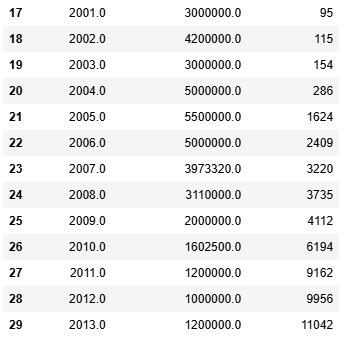

На таблице видно что с каждым годом количество раундов увеличивается, а сумма финансирования уменьшается.

**Люди и образование:**

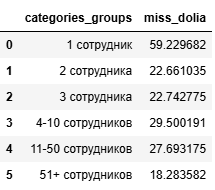

На таблице выше указаны категории компаний по кол-ву сотрудник и средняя доля в % по отсутствию информации об образовании. По таблице можно сделать вывод что чем больше сотрудников в кмпании, тем меньше доля об отсутствии информации об образовании и наоборот.

**Распределение цен по категориям компаний:**

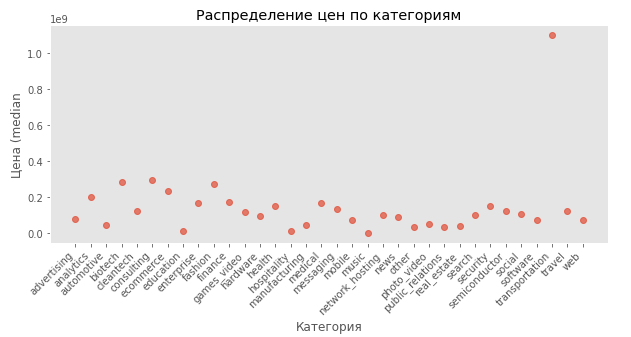

Компании делятся на 34 категории по столбцу cattegory_code. На графике представлено медиана сум компаний для каждой категории и как они распределяются.

На вопрос заказчика о типичном значении количества раундов для каждого возможного статуса стартапа можно ответить так:
* ipo - для данного статуса типичное значение 4 раунда.
* acquired - для данного статуса типичное значение 2 раунда.
* operating - для данного статуса типичное значение 2 раунда.
* closed - для данного статуса типичное значение 1 раунда.

# Содержание

[Введение](#1)<br>
[Шаг 1. Знакомство с данными: загрузка и первичная предобработка](#2)<br>
  [1.1. Вывод общей информации, исправление названия столбцов ](#3)<br>
  [1.2. Смена типов и анализ пропусков](#4)<br>
[Шаг 2. Предобработка данных, предварительное исследование](#5)<br>
  [2.1. Раунды финансирования по годам](#6)<br>
  [2.2. Люди и их образование](#7)<br>
  [2.3. Объединять или не объединять — вот в чём вопрос ](#8)<br>
  [2.4. Проблемный датасет и причина возникновения пропусков ](#9)<br>
[Шаг 3. Исследовательский анализ объединённых таблиц](#10)<br>
  [3.1. Объединение данных](#11)<br>
  [3.2. Анализ выбросов](#12)<br>
  [3.3. Куплены забесплатно?](#13)<br>
  [3.4. Цены стартапов по категориям ](#14)<br>
  [3.5. Сколько раундов продержится стартап перед покупкой](#15)<br>
[Шаг 4. Итоговый вывод и рекомендации](#16)<br>